# Introduction about the Analysis Report
### Company Background
Caffeine Form is a company creating coffee cups from recycled material. Although they
started selling the products on their website last year, the results were not as good as they
expected. To better enter the market, they decided to collaborate with local coffee shops to
advertise and sell their coffee cups.

The marketing team is trying to come up with the best criteria to choose possible
collaborators by investigating the local market. They think focusing on the places with the
most reviews might have the biggest impact as more good reviews will create more
excitement for their cups.

### Customer Questions
They would like you to answer the following questions to help:
- What is the most common place type in this local market?
- How does the range in number of reviews differ across all shops?
- How does the number of reviews vary across each place type?

### Objectives:
Have the analysis to development the coffee productions. 
- Which is the most place types and the relation between Place type, Rating, Review and Price? 
- Summary place type by Region to having overview about distribution of place type, help to find out whether or not rasing turnover?
- How does the number of reviews vary across each place type?
### Dataset:
Dataset has 9 columns about: Region, Place name, Place type, Rating, Reviews (number of reviews), Price, Delivery option, Dine in option, Takeout option. There are 3 final columns is in True/False type, explain does this place has delivery option, dine in option, takeout option or not.

## Import library

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset


In [62]:
df = pd.read_csv('coffee.csv')
df.head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,NaN,NaN
1,C,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,NaN,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: bool(1), float64(2), object(6)
memory usage: 12.8+ KB


## Data Validation

The original data is 200 rows and 9 columns. The first thing I did was to remove rows that should be excluded according to the data set description. I first removed rows where the Review value was missing. This was 2 rows, leaving 198 rows of data. 

In [64]:
### remove value missing of Reviews column:
mod_df = df.dropna( how='any',
                    subset=['Reviews'])
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           198 non-null    object 
 1   Place name       198 non-null    object 
 2   Place type       198 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            198 non-null    object 
 6   Delivery option  198 non-null    bool   
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: bool(1), float64(2), object(6)
memory usage: 14.1+ KB


 I also switched missing values in the Dine in option and Takeaway option with False. 


In [65]:
mod_df['Dine in option'][mod_df['Dine in option'].isnull()] = False
mod_df['Takeout option'][mod_df['Takeout option'].isnull()] = False
mod_df.head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,False,False
1,C,Коферум,Cafe,5.0,24.0,$$,False,False,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,False,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True


There were no values that were false originally so this correctly made these columns True/False values Looking at the remaining columns:

There were 10 unique regions, as expected
There were 4 place types, as expected
There were 185 unique place names, suggesting that some names are duplicated, this should be confirmed with the team providing the data
Rating values range from 3.9 to 5.0, so all are within the range expected
There are 3 price categories, as expected
There are 2 delivery options - True/False, as expected.

In [66]:
for col in list(mod_df.columns):
    col_uni = list(mod_df[col].unique())
    len_u = len(col_uni)
    print(col,'has',len_u,'unique values')

Region has 10 unique values
Place name has 185 unique values
Place type has 4 unique values
Rating has 12 unique values
Reviews has 163 unique values
Price has 3 unique values
Delivery option has 2 unique values
Dine in option has 2 unique values
Takeout option has 2 unique values


In [67]:
mod_df.describe()

,Rating,Reviews
count,198.000000,198.000000
mean,4.663636,622.494949
std,0.221648,1400.898666
min,3.900000,3.000000
25%,4.600000,47.500000
50%,4.700000,271.500000
75%,4.800000,786.250000
max,5.000000,17937.000000


- Region has 10 unique values
- Place name has 185 unique values
- Place type has 4 unique values
- Rating has 12 unique values
- Rating values from 3.9 to 5, average value is 4.66
- Reviews has 163 unique values
- Price has 3 unique values
- Delivery option has 2 unique values
- Dine in option has 2 unique values
- Takeout option has 2 unique values


## Data Discovery and Visualization

**What is the most common place type in this local market?**

There are 4 place type in this local market, which is the most common?

In [68]:
# mod_df['Place type'].groupby('Place type').count()
gr_Ptype = mod_df['Place type'].value_counts()
gr_Ptype

Coffee shop     96
Cafe            57
Others          25
Espresso bar    20
Name: Place type, dtype: int64

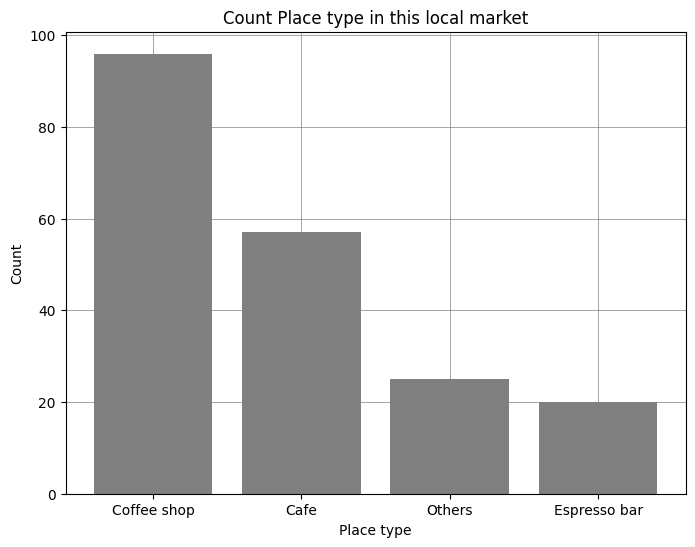

In [69]:
plt.figure(figsize=(8,6))
plt.bar(gr_Ptype.index,gr_Ptype.values,color ='grey', width = 0.8)
plt.grid(True, color = "grey", linewidth = "0.5")
plt.xlabel('Place type')
plt.ylabel('Count')
plt.title('Count Place type in this local market')
plt.show()

In [70]:
max_v = gr_Ptype[gr_Ptype == gr_Ptype.max()].index.to_list()
print('The most common place type is:',max_v)

The most common place type is: ['Coffee shop']


There are four possible types of store included in this data. The most common type listed is a coffee shop, with cafe being second although with half the number of locations. This would suggest that the team should focus on distributing their new cups in coffee shops as they are more common.

**How does the number of reviews vary across each place type?**

Finally we want to combine the two pieces of information to see how the place type impacts number of reviews. So far coffee shops with over 1000 reviews would be ideal but we need to look at the two variables together to see if this is realistic.

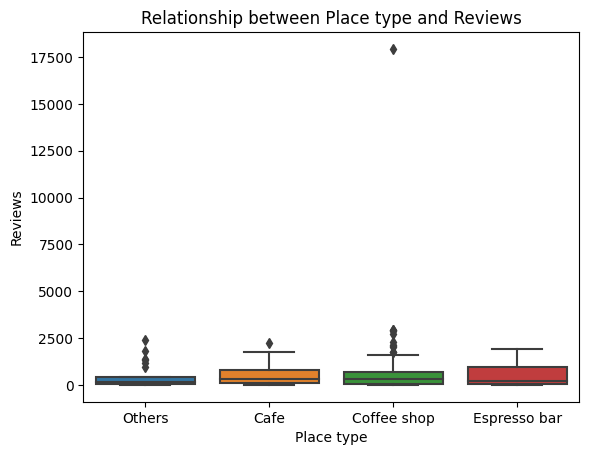

In [71]:
sns.boxplot(x='Place type',y='Reviews',data=mod_df)
plt.title('Relationship between Place type and Reviews')
plt.show()

In [72]:
## remove outliers:
out_id = mod_df[mod_df['Reviews']>5000].index
out_id
mod_df.drop(out_id[0], inplace = True)


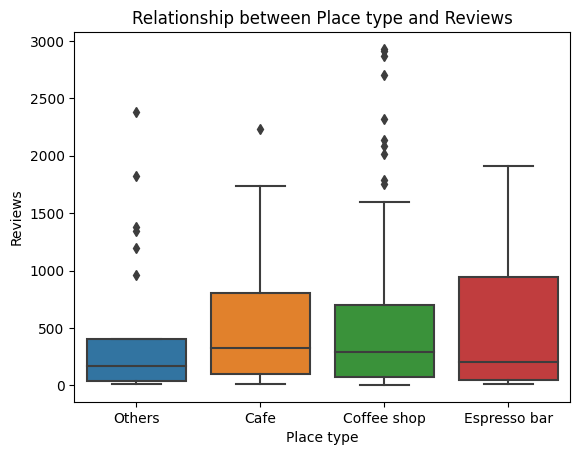

In [73]:
sns.boxplot(x='Place type',y='Reviews',data=mod_df)
plt.title('Relationship between Place type and Reviews')
plt.show()

In [74]:
# ### using z-score to detect ouliers:
# from scipy.stats import zscore
# #remove outliers:
# number_zscore = np.abs(zscore(mod_df['Reviews']))
# print(number_zscore)

# ### select range of ouliers:
# threshold = 2.5
# # Position of the outlier
# out_id = np.where(number_zscore > 2.5)

# ### remove outliers:
# mod_df.drop(out_id[0], inplace = True)

# ## visualization data after remove outliers
# sns.boxplot(x='Place type',y='Reviews',data=mod_df)
# plt.title('Relationship between Place type and Reviews')
# plt.show()

In [75]:
### remove outliers using IQR (remove all outliers?)

Based on all of the above, we would recommend that the team **focus on coffee shops with reviews over 1000** to start, but also keeps an open mind to including **cafes and espresso bars** with high reviews. 

Further analysis should be done to understand if store type really does impact the number of reviews. The team should also consider including their cups in stores with lower reviews so that we can further analyze whether reviews has any impact over the popularity of the new cups.